<p style="text-align:center">
    <a href="https://rofer.org/">
    <img src="https://rofer.org/wp-content/uploads/2022/09/analytics.png" width="200" alt="Machine Learning Mobile Price Prediction"  />
    </a>
</p>

# <font color="blue"><center>www.rofer.org</center>
## <font color="blue"><center>DIGITAL & DATA ENTHUSIAST</center></font>

# Using Wordcloud to understand Job title, Job desc and Job requirements for Mid-Senior, Senior and Director level roles in Singapore


# Project Context

## What does it takes to apply for director level roles in Singapore?
    

My work process flow

*   Use LinkedIn job postings and extract job titles and descriptions
*   Use basic EDA to understand the sequence of role levels in LinkedIn results
*   Use Wordcloud to highlight keywords in Job Title, Job Description and Job Requirments

<br>
<center>
    <img src="https://rofer.org/wp-content/uploads/2024/06/LinkedIn.png" width="500" alt="Machine Learning Mobile Price Prediction"  />
</center>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 100)

df = pd.read_csv("li_recommended_jobs - Sheet1.csv")
df.shape

(30, 10)

In [4]:
df.head(5)

,job_title,job_desc,job_reqs,recruiting_company,type,salary_min,salary_min.1,scope,years_experience_required,level
0,SEO Specialist,Job Descriptions\n\nManage & strategize organic search traffic and organic keyword ranking campa...,"Strong hands-on experience with organic search platforms such Google Analytics, Google Search Co...",MediaPlus Digital Pte Ltd,direct,"$3,200","$4,500",singapore,3.0,Associate
1,Marketing Analytics Lead Specialist,"""We want to be the best-in-class in how we are running marketing based on data and analytics. As...","The Perfect profile:\n\n\nStudied mathematics, statistics, computer science, economics or other ...",Castlery,direct,NaN,NaN,singapore,NaN,Mid-Senior
2,"Director, Consumer Insights","As a Director, Consumer Insights team, your responsibilities and key expectations will include\n...","Qualifications\n\nBachelor’s degree in Business, Marketing, Social Sciences or related fields\nM...",NielsenIQ,direct,NaN,NaN,singapore,8.0,Director
3,APAC Director of Data and Analytics - FMCG,Job Description\n\nYour main objective will be to lead Data Driven Transformation (DDT) in the A...,The Right Candidate Should Be Qualified With Following Criteria\n\nA digital and innovative mind...,Michael Page,Agency,NaN,NaN,apac,10.0,Director
4,"Associate Manager, SEO & Analytics",Job Responsibilities\n\nHelp develop and execute a strategy with the rest of the team to improve...,Pre-Requisites\n\nMinimally 3 - 5 years of SEO experience\nExtensive hands-on experience with th...,Razer Inc.,direct,NaN,NaN,singapore,5.0,Senior


In [5]:
df.dtypes

job_title                     object
job_desc                      object
job_reqs                      object
recruiting_company            object
type                          object
salary_min                    object
salary_min.1                  object
scope                         object
years_experience_required    float64
level                         object
dtype: object

# analyzing missing values in each columns

In [6]:
print(df["job_title"].isnull().sum())

0


In [7]:
print(df["job_desc"].isnull().sum())

0


In [8]:
print(df["job_reqs"].isnull().sum())

0


In [9]:
print(df["recruiting_company"].isnull().sum())

0


In [10]:
print(df["type"].isnull().sum())

0


In [11]:
print(df["salary_min"].isnull().sum())

29


In [12]:
print(df["salary_min.1"].isnull().sum())

29


In [13]:
print(df["scope"].isnull().sum())

0


In [14]:
print(df["years_experience_required"].isnull().sum())

4


In [15]:
print(df["level"].isnull().sum())

0


# removing columns and replacing values

In [16]:
##removing column names salary_min and salary_min.1 due to volume of missing values
df = df.drop(['salary_min', 'salary_min.1'], axis=1)
df.shape

(30, 8)

In [17]:
##getting the average years_experience_required for each role 
print(df["years_experience_required"].mean(skipna=True))

5.230769230769231


In [18]:
##replacing column years_experience_required with NAN values with the average years_experience_required
df["years_experience_required"].fillna(5,inplace=True)
print(df["years_experience_required"].isnull().sum())

0


In [19]:
##assign 
df.head(5)

,job_title,job_desc,job_reqs,recruiting_company,type,scope,years_experience_required,level
0,SEO Specialist,Job Descriptions\n\nManage & strategize organic search traffic and organic keyword ranking campa...,"Strong hands-on experience with organic search platforms such Google Analytics, Google Search Co...",MediaPlus Digital Pte Ltd,direct,singapore,3.0,Associate
1,Marketing Analytics Lead Specialist,"""We want to be the best-in-class in how we are running marketing based on data and analytics. As...","The Perfect profile:\n\n\nStudied mathematics, statistics, computer science, economics or other ...",Castlery,direct,singapore,5.0,Mid-Senior
2,"Director, Consumer Insights","As a Director, Consumer Insights team, your responsibilities and key expectations will include\n...","Qualifications\n\nBachelor’s degree in Business, Marketing, Social Sciences or related fields\nM...",NielsenIQ,direct,singapore,8.0,Director
3,APAC Director of Data and Analytics - FMCG,Job Description\n\nYour main objective will be to lead Data Driven Transformation (DDT) in the A...,The Right Candidate Should Be Qualified With Following Criteria\n\nA digital and innovative mind...,Michael Page,Agency,apac,10.0,Director
4,"Associate Manager, SEO & Analytics",Job Responsibilities\n\nHelp develop and execute a strategy with the rest of the team to improve...,Pre-Requisites\n\nMinimally 3 - 5 years of SEO experience\nExtensive hands-on experience with th...,Razer Inc.,direct,singapore,5.0,Senior


In [20]:
##assigning numerical values based on level and check correlation between years of experience VS job levels numerical equivalent
##Associate = 1, Mid = 2, Mid-Senior = 3, Senior = 4, Director = 5
df['job_level_equivalent'] = pd.np.where(df.level.str.contains("Associate"), 1,
                             pd.np.where(df.level.str.contains("Mid"), 2,
                             pd.np.where(df.level.str.contains("Mid-Senior"), 3,
                             pd.np.where(df.level.str.contains("Senior"), 4,
                             pd.np.where(df.level.str.contains("Director"), 5, 0)))))

/var/folders/5t/zhf5zpq97_v0_wbwkg9r5h200000gn/T/ipykernel_1800/2556373670.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['job_level_equivalent'] = pd.np.where(df.level.str.contains("Associate"), 1,
/var/folders/5t/zhf5zpq97_v0_wbwkg9r5h200000gn/T/ipykernel_1800/2556373670.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(df.level.str.contains("Mid"), 2,
/var/folders/5t/zhf5zpq97_v0_wbwkg9r5h200000gn/T/ipykernel_1800/2556373670.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(df.level.str.contains("Mid-Senior"), 3,
/var/folders/5t/zhf5zpq97_v0_wbwkg9r5h200000gn/T/ipykernel_1800/2556373670.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future 

# Basic EDA

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


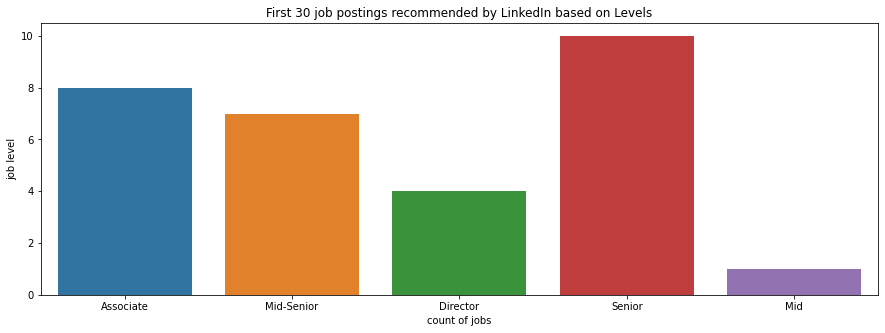

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(df["level"])
plt.xlabel("count of jobs")
plt.ylabel("job level")
plt.title("First 30 job postings recommended by LinkedIn based on Levels")
plt.show()

Text(0.5, 1.0, 'job_level_requirement | Associate = 1, Mid = 2, Mid-Senior = 3, Senior = 4, Director = 5 ')

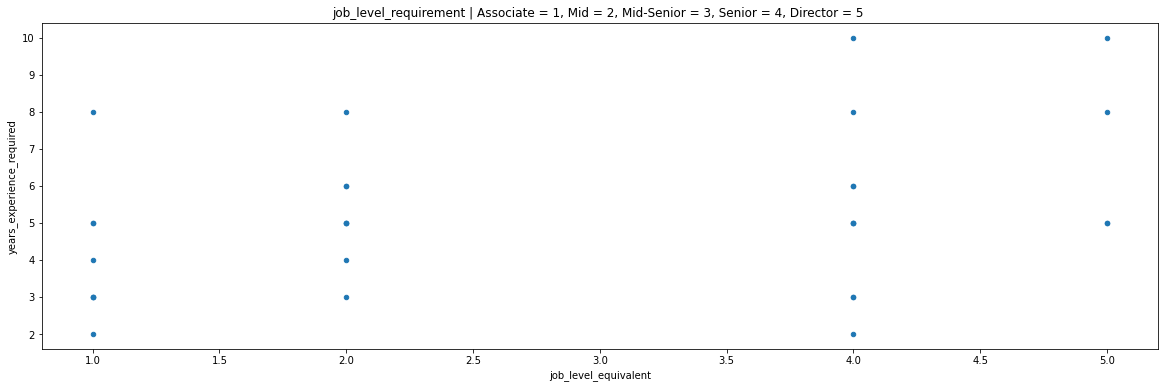

In [22]:
plt.rcParams["figure.figsize"] = (20,6)
df.plot.scatter(x="job_level_equivalent",y="years_experience_required")
plt.title("job_level_requirement | Associate = 1, Mid = 2, Mid-Senior = 3, Senior = 4, Director = 5 ")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


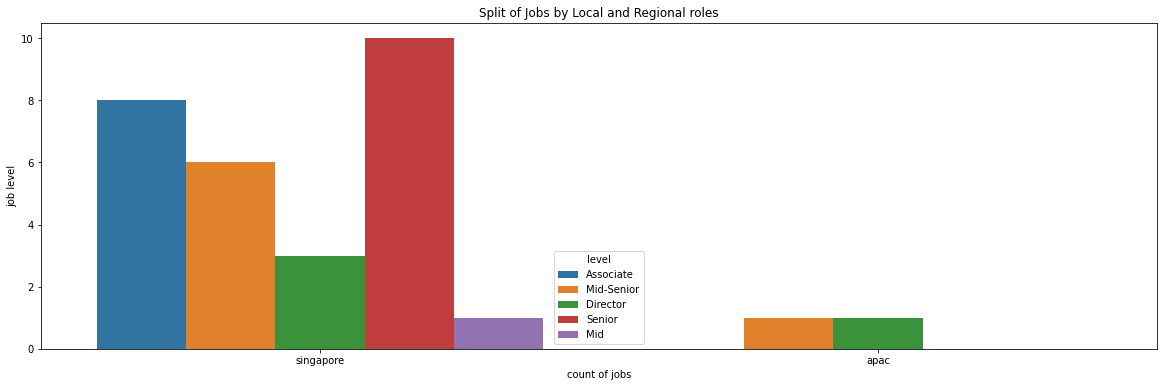

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(df["scope"],hue=df["level"])
plt.xlabel("count of jobs")
plt.ylabel("job level")
plt.title("Split of Jobs by Local and Regional roles")
plt.show()

# Understanding Job title, Job desc and Job requirements for Mid-Senior, Senior and Director level

In [24]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [25]:
##filter only  Mid-Senior, Senior and Director level rows
senior_roles = df.loc[(df['level'] == "Mid-Senior") | (df['level'] == "Senior")  | (df['level'] == "Director")]
senior_roles.shape

(21, 9)

In [26]:
senior_roles.head(2)

,job_title,job_desc,job_reqs,recruiting_company,type,scope,years_experience_required,level,job_level_equivalent
1,Marketing Analytics Lead Specialist,"""We want to be the best-in-class in how we are running marketing based on data and analytics. As...","The Perfect profile:\n\n\nStudied mathematics, statistics, computer science, economics or other ...",Castlery,direct,singapore,5.0,Mid-Senior,2
2,"Director, Consumer Insights","As a Director, Consumer Insights team, your responsibilities and key expectations will include\n...","Qualifications\n\nBachelor’s degree in Business, Marketing, Social Sciences or related fields\nM...",NielsenIQ,direct,singapore,8.0,Director,5


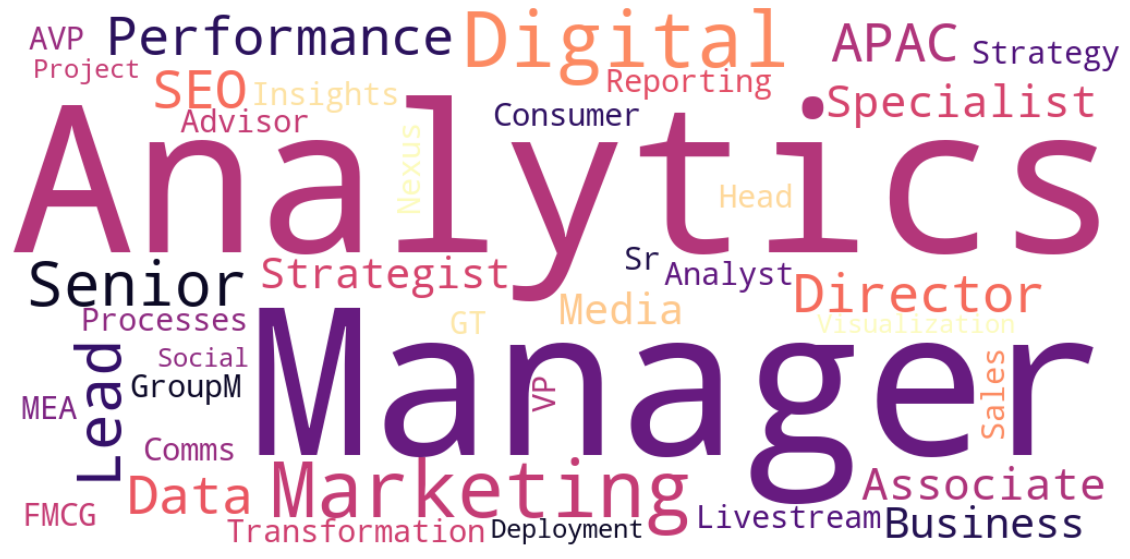

In [27]:
text = " ".join(item for item in senior_roles['job_title'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=1024, 
                      height=500,
                      colormap="magma"
                     ).generate(text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

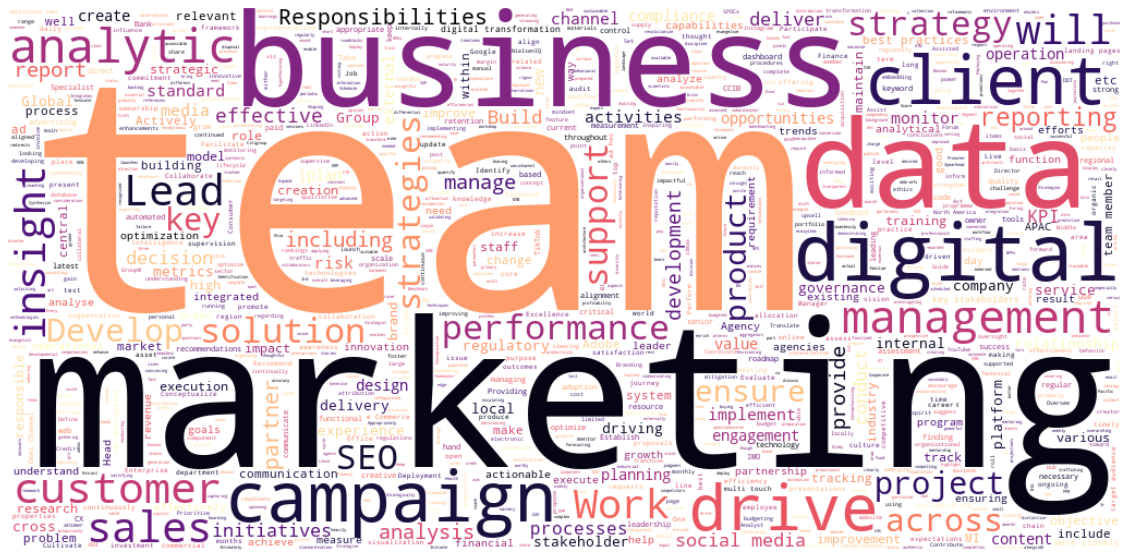

In [28]:
text = " ".join(item for item in senior_roles['job_desc'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color="white", 
                      max_words=1000,
                      max_font_size=300,
                      width=1024, 
                      height=500,
                      colormap="magma"
                     ).generate(text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

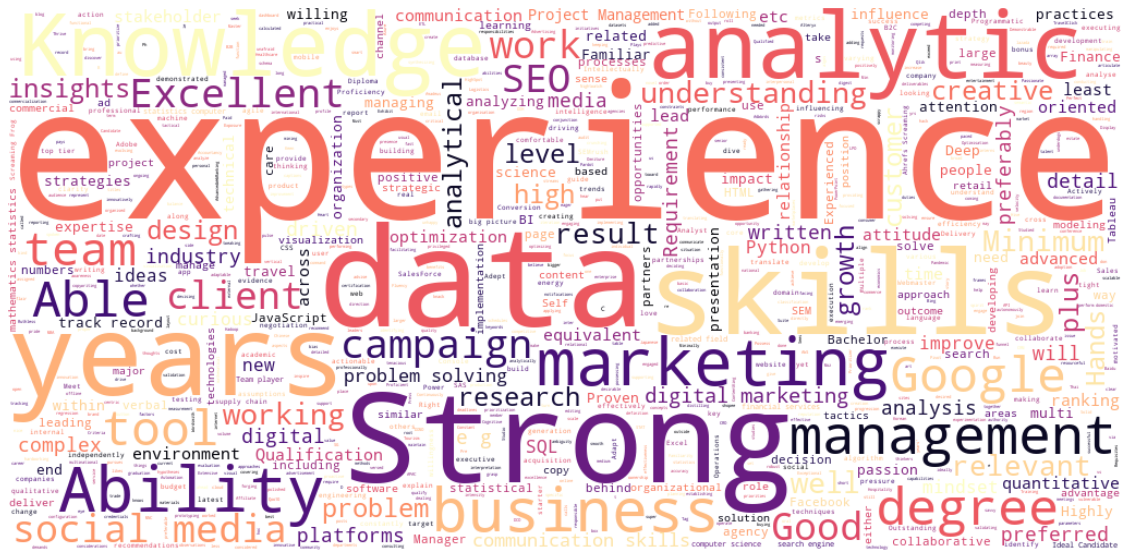

In [29]:
text = " ".join(item for item in senior_roles['job_reqs'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color="white", 
                      max_words=1000,
                      max_font_size=300,
                      width=1024, 
                      height=500,
                      colormap="magma"
                     ).generate(text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [30]:
senior_roles["recruiting_company"]


1                    Castlery
2                   NielsenIQ
3                Michael Page
4                  Razer Inc.
7                  SuperMom\n
8     Electrolux Professional
9                   OCBC Bank
11                  Big Cloud
13                     GroupM
14                    Adobe\n
15                       Citi
17                GoodHood.SG
18         Randstad Singapore
19                   TikTok\n
20          Johnson & Johnson
21                    SEPHORA
22        Epitome Productions
23      Far East Organization
24         Evident Scientific
25    Standard Chartered Bank
28                  Amadeus\n
Name: recruiting_company, dtype: object

# Understanding Job title, Job desc and Job requirements for Associate and Mid level


In [31]:
##filter only  Mid-Senior, Senior and Director level rows
jr_mid_roles = df.loc[(df['level'] == "Associate") | (df['level'] == "Mid")]
jr_mid_roles.shape

(9, 9)

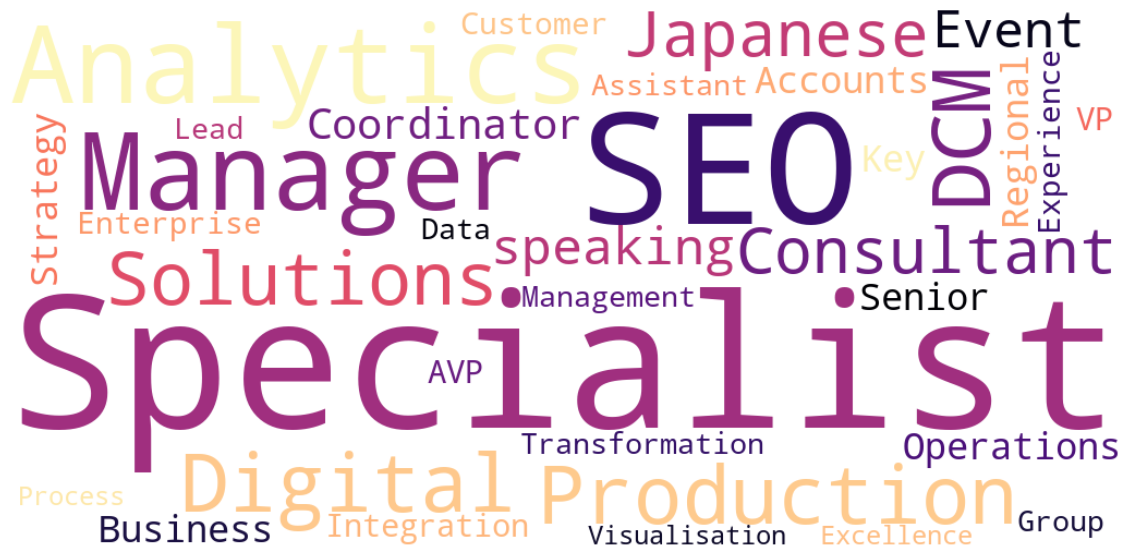

In [32]:
text = " ".join(item for item in jr_mid_roles['job_title'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=1024, 
                      height=500,
                      colormap="magma"
                     ).generate(text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

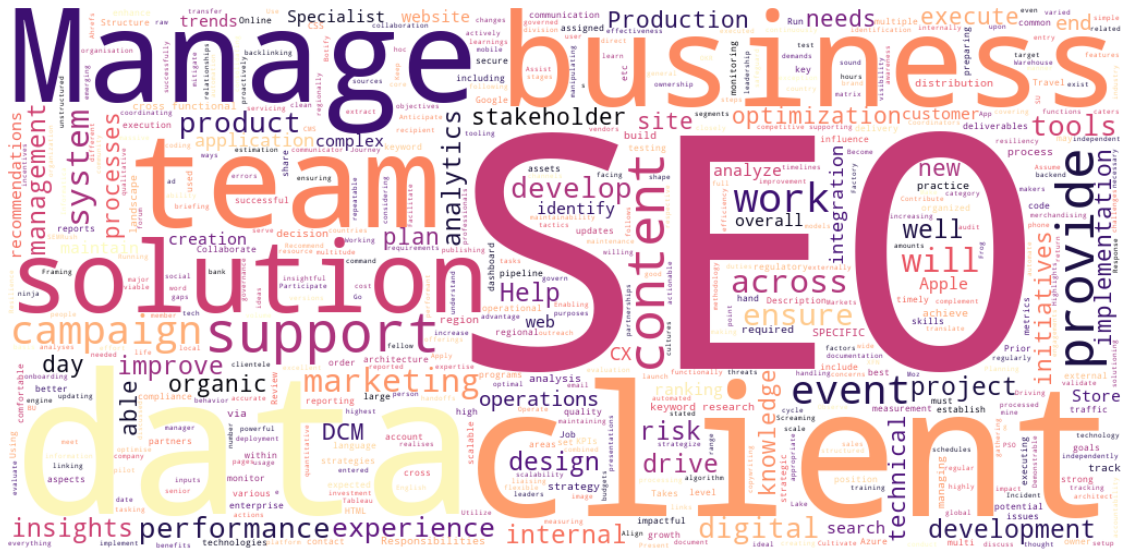

In [33]:
text = " ".join(item for item in jr_mid_roles['job_desc'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color="white", 
                      max_words=1000,
                      max_font_size=300,
                      width=1024, 
                      height=500,
                      colormap="magma"
                     ).generate(text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

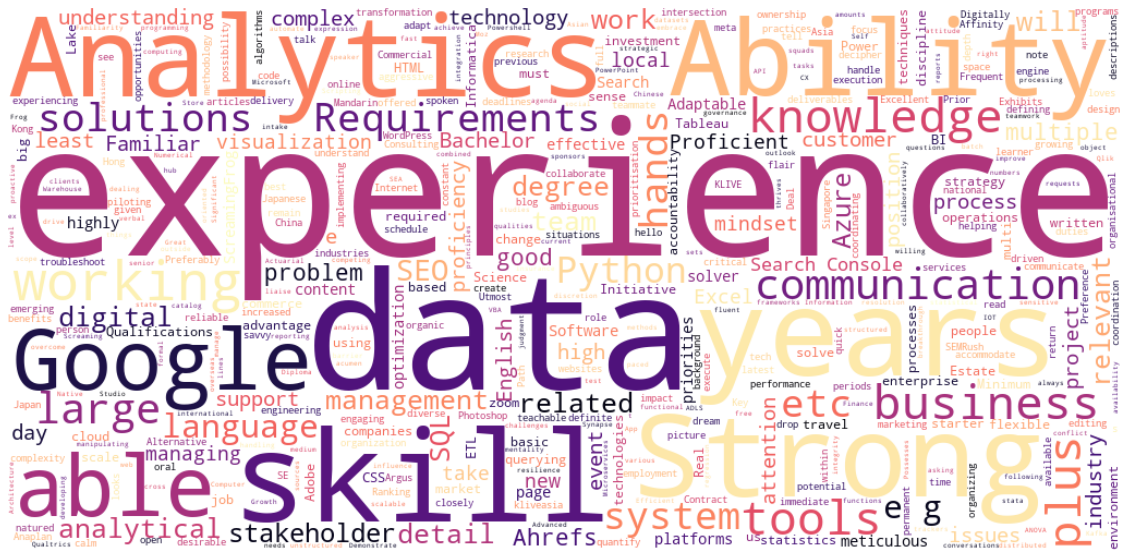

In [34]:
text = " ".join(item for item in jr_mid_roles['job_reqs'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color="white", 
                      max_words=1000,
                      max_font_size=300,
                      width=1024, 
                      height=500,
                      colormap="magma"
                     ).generate(text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [35]:
jr_mid_roles["recruiting_company"]

0                                                                               MediaPlus Digital Pte Ltd
5                                                                                                   Apple
6                                                                                       Renoir Consulting
10    KLIVE Asia is growing with positions open in event coordination and operations! If you are a peo...
12                                                                                                 TikTok
16                                                                                        The Egg Company
26                                                                                         Michael Page\n
27                                                                                             DBS Bank\n
29                                                                                         GREAT EASTERN 
Name: recruiting_company, dtype: object